#Models without considering Well Bore Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('All_wells_final3.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()
model_mse_dict={}
model_R2_dict={}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   7882 non-null   object 
 1   WELL_BORE_CODE            7882 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     7882 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  7882 non-null   float64
 4   AVG_DP_TUBING             7882 non-null   float64
 5   AVG_ANNULUS_PRESS         7882 non-null   float64
 6   AVG_CHOKE_SIZE_P          7882 non-null   float64
 7   AVG_WHP_P                 7882 non-null   float64
 8   AVG_WHT_P                 7882 non-null   float64
 9   DP_CHOKE_SIZE             7882 non-null   float64
 10  BORE_OIL_VOL              7882 non-null   float64
 11  BORE_GAS_VOL              7882 non-null   float64
 12  BORE_WAT_VOL              7882 non-null   float64
 13  WELL_POS                  7882 non-null   object 
dtypes: float

In [3]:
#Dropping AVG_ANNULUS PRESSURE as this is not measured at the surface, dropping downhole temp as this is related to downhole pressure
data=data.drop(['AVG_ANNULUS_PRESS'], axis=1)
data = data.loc[data['AVG_DOWNHOLE_PRESSURE']!= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 7881
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 4   AVG_DP_TUBING             5943 non-null   float64
 5   AVG_CHOKE_SIZE_P          5943 non-null   float64
 6   AVG_WHP_P                 5943 non-null   float64
 7   AVG_WHT_P                 5943 non-null   float64
 8   DP_CHOKE_SIZE             5943 non-null   float64
 9   BORE_OIL_VOL              5943 non-null   float64
 10  BORE_GAS_VOL              5943 non-null   float64
 11  BORE_WAT_VOL              5943 non-null   float64
 12  WELL_POS                  5943 non-null   object 
dtypes: float64(10), object(3)
memory usage: 650.0+ KB


In [4]:
#Keeping all columns except AVG DP TUBING
df1 = data.loc[:,'AVG_CHOKE_SIZE_P':'BORE_WAT_VOL']
df1=df1.drop(['DP_CHOKE_SIZE'], axis=1)
feature_names = df1.columns
df1.head()


,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,43.34,107.36,37.94,631.47,90439.09,0.0
1,47.17,99.19,60.76,1166.46,165720.39,0.0
2,47.73,94.60,63.05,1549.81,221707.31,0.0
3,48.53,89.99,64.55,1248.70,178063.52,0.0
4,49.84,84.78,65.72,1345.78,192602.19,0.0


In [5]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

In [6]:
#Create Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)


LINEAR REGRESSION

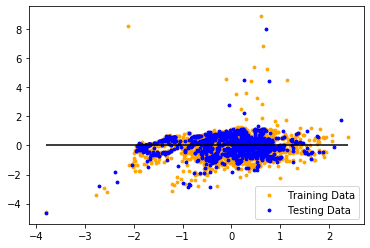

Mean Squared Error (MSE) Train Data: 0.4104764233048474
R-squared (R2) Train Data: 0.5895235766951525
-----------------------------------
Mean Squared Error (MSE) Test Data: 0.41489872961484503
R-squared (R2) Test Data: 0.5781517750328994


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.preprocessing import StandardScaler
model.fit(X_train_s, y_train_s)


# Plot the Residuals for the Training and Testing data
predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot Residuals
plt.scatter(predictions.reshape(-1,1), predictions.reshape(-1,1) - y_train_s, c= "orange",label="Training Data", s=8)
plt.scatter(predictions1.reshape(-1,1), predictions1.reshape(-1,1) - y_test_s, c= "blue",label="Testing Data",s=8)
#plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.legend()
plt.show()

# Model Scores
# Score the prediction with mse and r2

from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train_s, predictions)
r2_train = r2_score(y_train_s, predictions)
mse_test = mean_squared_error(y_test_s, predictions1)
r2_test = r2_score(y_test_s, predictions1)


model_mse_dict.update(LINEAR_REG = mse_test)
model_R2_dict.update(LINEAR_REG = r2_test)

print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")


RANDOM FOREST REGRESSION

Model:RANDOM FOREST REGRESSION
R2 Score: 0.8217330702904028
Mean Squared Error (MSE): 0.1753301739615451
R-squared (R2 ): 0.8217330702904028


Text(0.5, 1.0, 'Residual Plot')

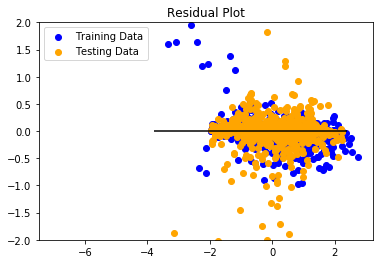

In [8]:
## training the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=100)
rf.fit(X_train_s,y_train_s.ravel())
score = rf.score(X_test_s, y_test_s.ravel())
print("Model:RANDOM FOREST REGRESSION")
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = rf.predict(X_test_s)
mse = mean_squared_error(y_test_s.ravel(), predicted_train)
r2 = r2_score(y_test_s.ravel(), predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RAND_FOR_REG = mse)
model_R2_dict.update(RAND_FOR_REG = r2)

predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot the Residuals for the Training and Testing data
plt.scatter(rf.predict(X_train_s), rf.predict(X_train_s) - y_train_s.ravel(), c="blue", label="Training Data")
plt.scatter(rf.predict(X_test_s), rf.predict(X_test_s) - y_test_s.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.ylim(-2,2)
plt.title("Residual Plot")

In [9]:
importances= rf.feature_importances_
sorted(zip(importances,feature_names),reverse=True)

[(0.33077776107947876, 'AVG_WHP_P'),
 (0.2671078002125354, 'AVG_WHT_P'),
 (0.15257218727822053, 'BORE_WAT_VOL'),
 (0.09630303591898123, 'BORE_GAS_VOL'),
 (0.09283111091003723, 'AVG_CHOKE_SIZE_P'),
 (0.060408104600746866, 'BORE_OIL_VOL')]

RIDGE REGRESSION

R2 Score: 0.5781854637506367
Mean Squared Error (MSE): 0.41486559588246374
R-squared (R2 ): 0.5781854637506367


Text(0.5, 1.0, 'Residual Plot')

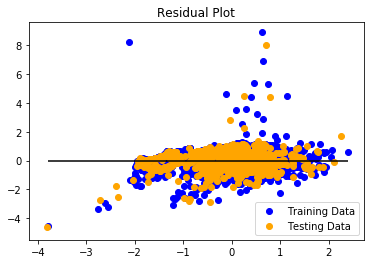

In [10]:
## training the model
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RIDGE_REG = mse)
model_R2_dict.update(RIDGE_REG = r2)

predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")

In [11]:
importances= model.coef_
sorted(zip(importances[0],feature_names),reverse=True)

[(1.1349288702797151, 'BORE_OIL_VOL'),
 (0.8635631138434333, 'AVG_WHP_P'),
 (0.3419487768200265, 'BORE_WAT_VOL'),
 (0.3198514496509339, 'AVG_CHOKE_SIZE_P'),
 (0.3010161406443698, 'AVG_WHT_P'),
 (-1.5705164486614753, 'BORE_GAS_VOL')]

LASSO REGRESSION

R2 Score: 0.5781524611967419
Mean Squared Error (MSE): 0.4148980547548131
R-squared (R2 ): 0.5781524611967419


Text(0.5, 1.0, 'Residual Plot')

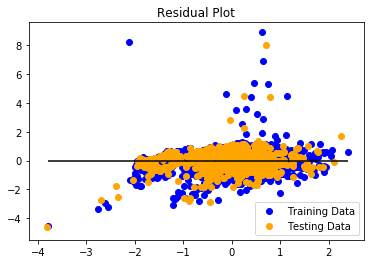

In [12]:
## training the model
from sklearn.linear_model import Lasso
model = Ridge(alpha=0.001, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(LASSO_REG = mse)
model_R2_dict.update(LASSO_REG = r2)

predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")

In [13]:
importances= model.coef_
sorted(zip(importances[0],feature_names),reverse=True)

[(1.145683838467842, 'BORE_OIL_VOL'),
 (0.8637085621094606, 'AVG_WHP_P'),
 (0.34229568304449615, 'BORE_WAT_VOL'),
 (0.3197464509890191, 'AVG_CHOKE_SIZE_P'),
 (0.3009613279952605, 'AVG_WHT_P'),
 (-1.5812665941373385, 'BORE_GAS_VOL')]

In [14]:
#Displaying the MSE scores by models
model_mse_dict

{'LINEAR_REG': 0.41489872961484503,
 'RAND_FOR_REG': 0.1753301739615451,
 'RIDGE_REG': 0.41486559588246374,
 'LASSO_REG': 0.4148980547548131}

In [15]:
#Displaying the R2 scores by models
model_R2_dict

{'LINEAR_REG': 0.5781517750328994,
 'RAND_FOR_REG': 0.8217330702904028,
 'RIDGE_REG': 0.5781854637506367,
 'LASSO_REG': 0.5781524611967419}